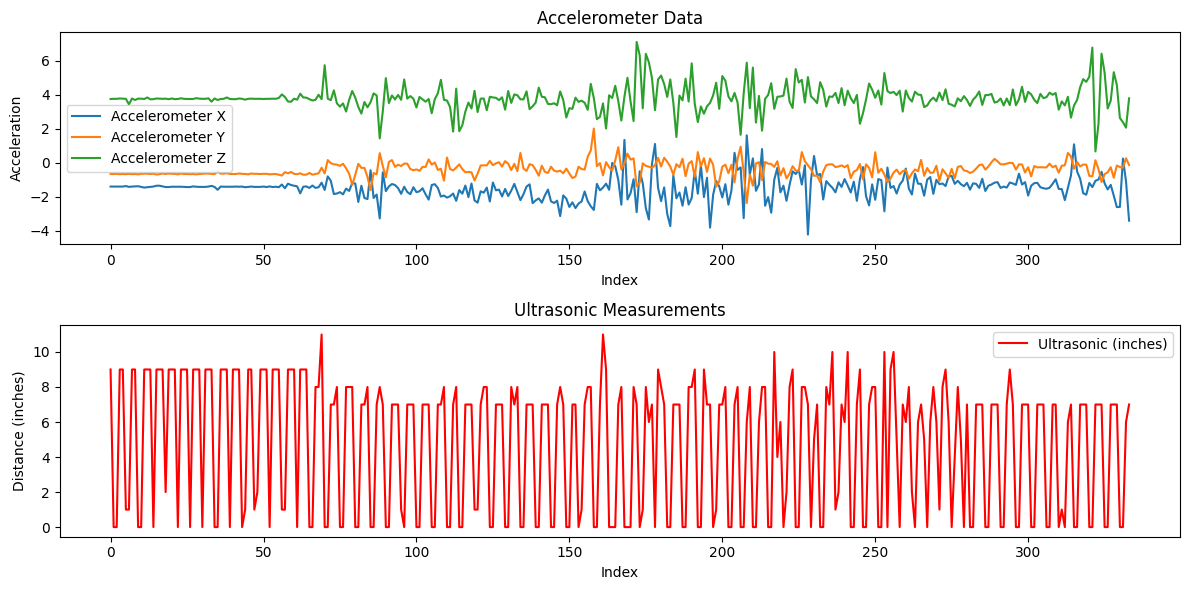

               Time  Longitude  Latitude
162  5/2/2024 12:29  30.143209 -1.932043
176  5/2/2024 12:30  30.144285 -1.932417
195  5/2/2024 12:31  30.145166 -1.933626
209  5/2/2024 12:31  30.145620 -1.934467
213  5/2/2024 12:31  30.145830 -1.934701
219  5/2/2024 12:32  30.146097 -1.934954
221  5/2/2024 12:32  30.146170 -1.935015
231  5/2/2024 12:32  30.146585 -1.935403
245  5/2/2024 12:33  30.146860 -1.935602
261  5/2/2024 12:34  30.147270 -1.935966
263  5/2/2024 12:34  30.147310 -1.936003
266  5/2/2024 12:34  30.147383 -1.936067
269  5/2/2024 12:34  30.147427 -1.936110
270  5/2/2024 12:34  30.147436 -1.936119
294  5/2/2024 12:35  30.147585 -1.936312
295  5/2/2024 12:35  30.147585 -1.936299


In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV data into a pandas DataFrame
df = pd.read_csv("data/sensor_data1.csv")

# Define boundaries for accelerometer data
accel_x_min, accel_x_max = -2, -1
accel_y_min, accel_y_max = -2, -1
accel_z_min, accel_z_max = -2, -1

# Initialize variables to store defect points
defect_points = []

# Iterate through the DataFrame rows
for i in range(1, len(df)):
    # Check accelerometer data boundaries
    if (
        df.loc[i, 'Accelerometer X'] < accel_x_min or df.loc[i, 'Accelerometer X'] > accel_x_max or
        df.loc[i, 'Accelerometer Y'] < accel_y_min or df.loc[i, 'Accelerometer Y'] > accel_y_max or
        df.loc[i, 'Accelerometer Z'] < accel_z_min or df.loc[i, 'Accelerometer Z'] > accel_z_max
    ):
        # Check if ultrasonic measurement has changed by 2 inches compared to the previous
        if abs(df.loc[i, 'Ultrasonic (inches)'] - df.loc[i-1, 'Ultrasonic (inches)']) == 2:
            defect_points.append(df.iloc[i])

# Convert defect points to DataFrame
defect_df = pd.DataFrame(defect_points)

# Visualize accelerometer data and ultrasonic measurements
plt.figure(figsize=(12, 6))

# Plot accelerometer data
plt.subplot(2, 1, 1)
plt.plot(df.index, df['Accelerometer X'], label='Accelerometer X')
plt.plot(df.index, df['Accelerometer Y'], label='Accelerometer Y')
plt.plot(df.index, df['Accelerometer Z'], label='Accelerometer Z')
plt.title('Accelerometer Data')
plt.xlabel('Index')
plt.ylabel('Acceleration')
plt.legend()

# Plot ultrasonic measurements
plt.subplot(2, 1, 2)
plt.plot(df.index, df['Ultrasonic (inches)'], label='Ultrasonic (inches)', color='red')
plt.title('Ultrasonic Measurements')
plt.xlabel('Index')
plt.ylabel('Distance (inches)')
plt.legend()

plt.tight_layout()
plt.show()

# Print the defect points with their location
print(defect_df[['Time', 'Longitude', 'Latitude']])

In [22]:
import pandas as pd
import folium

# Load the CSV data into a pandas DataFrame
df = pd.read_csv("data/sensor_data1.csv")

# Define boundaries for accelerometer data
accel_x_min, accel_x_max = -2, -1
accel_y_min, accel_y_max = -2, -1
accel_z_min, accel_z_max = -2, -1

# Initialize variables to store defect points
defect_points = []

# Iterate through the DataFrame rows
for i in range(1, len(df)):
    # Check accelerometer data boundaries
    if (
        
        df.loc[i, 'Accelerometer Y'] < accel_y_min or df.loc[i, 'Accelerometer Y'] > accel_y_max
    ):
        # Check if ultrasonic measurement has changed by 2 inches compared to the previous
        if abs(df.loc[i, 'Ultrasonic (inches)'] - df.loc[i-1, 'Ultrasonic (inches)']) == 2:
            defect_points.append(df.iloc[i])

# Convert defect points to DataFrame
defect_df = pd.DataFrame(defect_points)

# Create a Folium map centered on the mean of latitude and longitude
map_center = [df['Latitude'].mean(), df['Longitude'].mean()]
mymap = folium.Map(location=map_center, zoom_start=12)

# Add markers for defect points
for index, row in defect_df.iterrows():
    folium.Marker(location=[row['Latitude'], row['Longitude']], popup=row['Time'], icon=folium.Icon(color='red')).add_to(mymap)

# Add a line connecting all coordinates
coordinates = list(zip(df['Latitude'], df['Longitude']))
folium.PolyLine(locations=coordinates, color='red').add_to(mymap)

# Save the map to an HTML file
mymap.save("defects_map.html")

# Display the map
mymap
